# FLIP (00): Data Science 
**(Module 01: Data Science)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2023 [TULIP Lab](http://www.tulip.org.au), Australia

---

## Session 5 Scikit Learn Random Forest

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

sns.set()


## Random Forest Classifier

Random forests are an example of an *ensemble learner* built on decision trees.
For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification:

*Notice：*

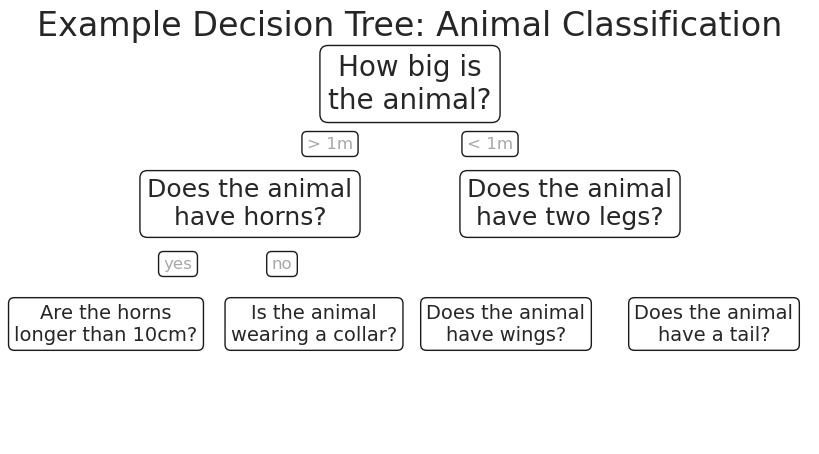

In [2]:
#If you encounter such an error ： No module named 'fig_code'
#Download the fig_code module from GitHub by typing the following command in the terminal:
#svn checkout https://github.com/jakevdp/sklearn_pycon2015/trunk/notebooks/fig_code
#A folder named'fig_code' will appear in your home directory
#Move'fig_code' to the folder where the script is located

import fig_code     
fig_code.plot_example_decision_tree()

The binary splitting makes this extremely efficient.
As always, though, the trick is to *ask the right questions*.
This is where the algorithmic process comes in: in training a decision tree classifier, the algorithm looks at the features and decides which questions (or "splits") contain the most information.

### Creating a Decision Tree

Here's an example of a decision tree classifier in scikit-learn. We'll start by defining some two-dimensional labeled data:

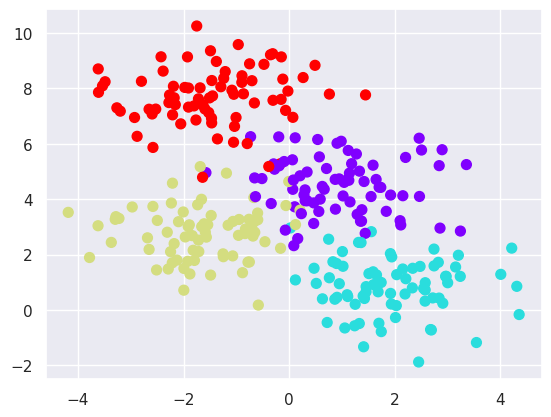

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [4]:
# We have some convenience functions in the repository that help 

#从这里找到 'widgets'，https://github.com/twz915/DjangoUeditor3/tree/master/DjangoUeditor

from fig_code import visualize_tree, plot_tree_interactive

# Now using IPython's ``interact`` (available in IPython 2.0+, and requires a live kernel) we can view the decision tree splits:
plot_tree_interactive(X, y);

interactive(children=(IntSlider(value=1, description='depth', max=10, min=1), Output()), _dom_classes=('widget…

Notice that at each increase in depth, every node is split in two **except** those nodes which contain only a single class.
The result is a very fast **non-parametric** classification, and can be extremely useful in practice.

**Question: Do you see any problems with this?**

### Decision Trees and over-fitting

One issue with decision trees is that it is very easy to create trees which **over-fit** the data. That is, they are flexible enough that they can learn the structure of the noise in the data rather than the signal! For example, take a look at two trees built on two subsets of this dataset:

<Figure size 640x480 with 0 Axes>

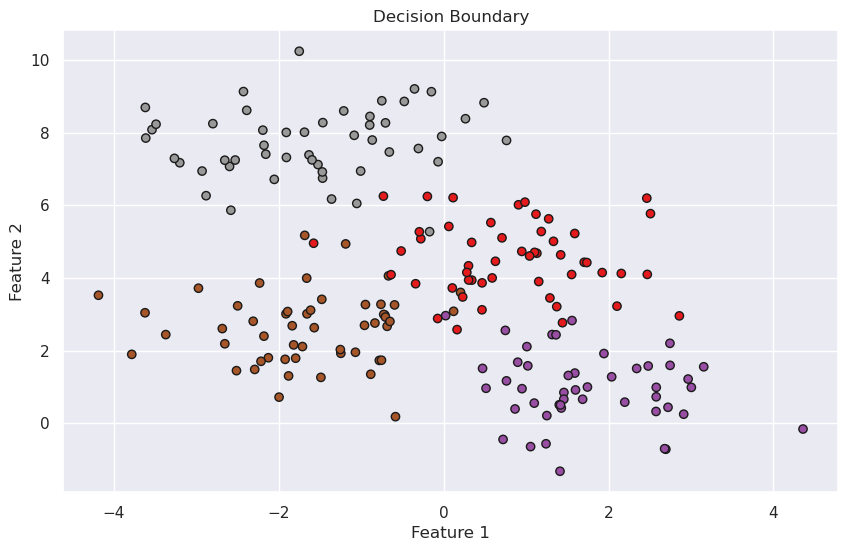

<Figure size 640x480 with 0 Axes>

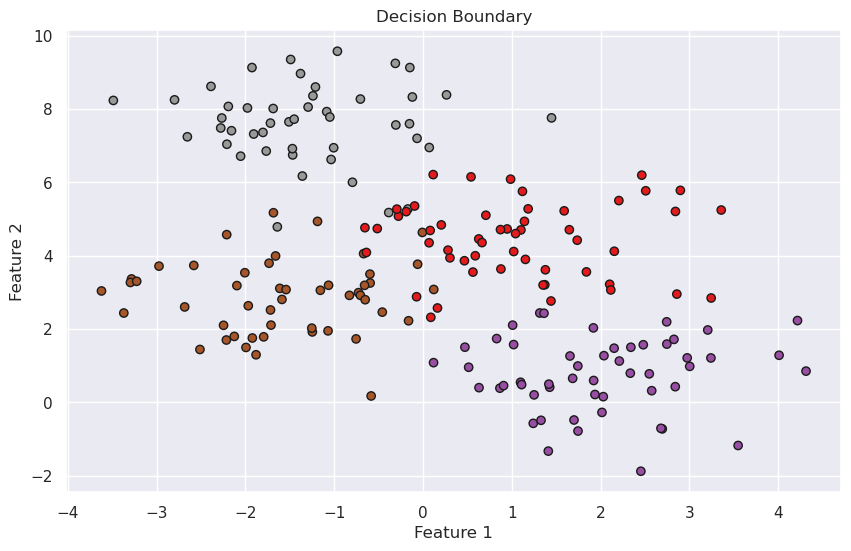

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

The details of the classifications are completely different! That is an indication of **over-fitting**: when you predict the value for a new point, the result is more reflective of the noise in the model rather than the signal.

### ELI5: Random Forests Explained

Imagine you’re trying to predict whether a fruit is an apple or an orange. You ask a bunch of friends (let’s call them "decision trees") to help you. Each friend looks at the fruit and makes a guess based on its color, size, and shape. But here’s the catch: each friend only gets to see a random part of the fruit (like just the color or just the size), and they also only see a random selection of fruits from your basket.

Now, some friends might be really good at guessing, while others might make mistakes. But if you ask *all* your friends and take the most common answer (like a vote), you’re likely to get a much better prediction than if you just asked one friend. This is the idea behind **Random Forests**!

### How It Works:

1. **Many Trees (Friends):** A Random Forest is a group of decision trees. Each tree is like a friend who makes a prediction based on a random part of the data.
   
2. **Randomness:** To make sure the trees don’t all make the same mistakes, they each get a random subset of the data and a random set of features (like color, size, etc.) to look at.

3. **Averaging the Predictions:** After all the trees make their guesses, the Random Forest takes the average (for numbers) or the majority vote (for categories) to make the final prediction.

### Why It’s Awesome:

- **Less Overfitting:** If one tree makes a mistake, the others can balance it out. This makes the Random Forest less likely to overfit (i.e., memorize the data instead of learning from it).
- **Accurate:** By combining many trees, Random Forests often give really good predictions.
- **Feature Importance:** It can tell you which features (like color or size) are most important for making the prediction.

### Example in Simple Terms:

Let’s say you’re trying to predict if a fruit is an apple or an orange. You have 100 friends (trees), and each one looks at a random set of fruits and a random set of features (like color, size, etc.). After they all make their guesses, you take the most common answer. If 60 friends say it’s an apple and 40 say it’s an orange, the Random Forest would predict it’s an apple.

### In Code:

```python
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest with 100 trees
forest = RandomForestClassifier(n_estimators=100)

# Train it on your data
forest.fit(X_train, y_train)

# Make a prediction
prediction = forest.predict(X_test)
```

### Key Points:

- **Many Trees:** The more trees, the better the prediction (but it takes more time).
- **Randomness:** Each tree gets a random subset of data and features to keep things diverse.
- **Voting:** The final prediction is based on the majority vote or average of all the trees.

In short, Random Forests are like asking a bunch of friends for their opinions and going with the most popular answer—it’s a smart way to make better predictions!

In [12]:
from ipywidgets import interact

# Function to visualize the decision tree
def visualize_tree(clf, X, y, boundaries=False, xlim=None, ylim=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    if boundaries:
        u = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        v = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
        U, V = np.meshgrid(u, v)
        Z = clf.predict(np.c_[U.ravel(), V.ravel()])
        Z = Z.reshape(U.shape)
        plt.contourf(U, V, Z, alpha=0.2, cmap=plt.cm.Paired)
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

# Function to fit a randomized tree
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                  xlim=(X[:, 0].min(), X[:, 0].max()),
                  ylim=(X[:, 1].min(), X[:, 1].max()))

# Use interact to visualize the tree with different random states
interact(fit_randomized_tree, random_state=[0, 100]);

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

See how the details of the model change as a function of the sample, while the larger characteristics remain the same!
The random forest classifier will do something similar to this, but use a combined version of all these trees to arrive at a final answer:

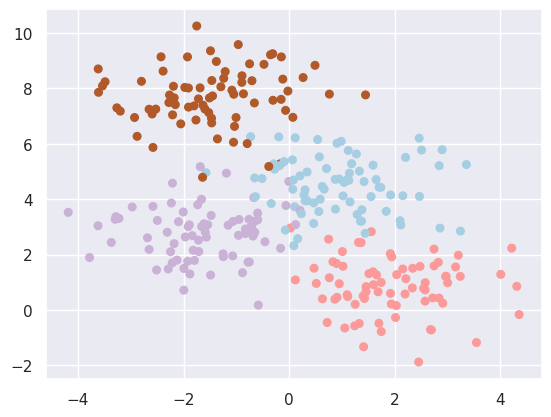

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
visualize_tree(clf, X, y, boundaries=False);

By averaging over 100 randomly perturbed models, we end up with an overall model which is a much better fit to our data!

*(Note: above we randomized the model through sub-sampling... Random Forests use more sophisticated means of randomization, which you can read about in, e.g. the [scikit-learn documentation](http://scikit-learn.org/stable/modules/ensemble.html#forest)*)

Sure! Let me break it down in simple terms:

### Random Forests are **not great** for:

1. **Lots of 0s, Few 1s (Imbalanced Data):**
   - If your dataset has way more examples of one class (e.g., 90% 0s and 10% 1s), Random Forests might struggle to learn the minority class well. They tend to focus on the majority class, leading to poor performance for the minority class.

2. **Structured Data Like Images:**
   - Random Forests work best with tabular data (rows and columns). For structured data like images, neural networks (e.g., CNNs) are much better because they can capture spatial patterns and relationships in the data.

3. **Small Data:**
   - If you have very little data, Random Forests might overfit. Overfitting means the model learns the noise in the data instead of the actual patterns, making it perform poorly on new, unseen data.

4. **High-Dimensional Data:**
   - If your data has a lot of features (e.g., thousands of columns), Random Forests might not perform as well. In such cases, simpler models like linear models or dimensionality reduction techniques might work better.

### When **are** Random Forests good?
- For **tabular data** with a moderate number of features.
- When you want a model that’s easy to interpret and robust to outliers.
- When you have a **balanced dataset** and enough data to avoid overfitting.

In summary, Random Forests are powerful but not a one-size-fits-all solution. Choose the right tool for the job!

## Random Forest Regressor

Above we were considering random forests within the context of classification.
Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is ``sklearn.ensemble.RandomForestRegressor``.

Let's quickly demonstrate how this can be used:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

In [ ]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

### ELI5: Why is it Called a Non-Parametric Random Forest?

Imagine you’re building a model to predict something, like whether a fruit is an apple or an orange. Some models, like linear regression, make strong assumptions about the data—like assuming the relationship between features and the target is a straight line. These models are called **parametric** because they have a fixed number of parameters (like the slope and intercept of the line) that define their behavior.

Now, think of a **Random Forest**. It doesn’t make any strong assumptions about the data. Instead, it just builds a bunch of decision trees that split the data based on the features, without assuming any specific shape or structure. Because it doesn’t rely on a fixed set of parameters to define the model, it’s called **non-parametric**.

### Key Points:

1. **Parametric Models:** These models assume a specific form for the data (like a straight line or a curve) and have a fixed number of parameters. Examples include linear regression or logistic regression.

2. **Non-Parametric Models:** These models don’t assume any specific form for the data. Instead, they adapt to the data’s structure. Random Forests are non-parametric because they build trees based on the data without assuming any particular shape or relationship.

3. **Why Random Forests are Non-Parametric:**
   - **No Fixed Parameters:** Random Forests don’t have a fixed number of parameters like slope or intercept. Instead, they grow trees based on the data, and the number of splits (and thus the complexity) can vary.
   - **Data-Driven:** The model’s structure is entirely determined by the data, not by predefined assumptions.

### Example in Simple Terms:

Imagine you’re trying to predict the price of a house. A parametric model might assume that the price depends linearly on the size of the house (bigger houses are more expensive). But a Random Forest doesn’t assume anything—it just looks at the data and builds trees that split the houses based on size, location, number of rooms, etc. It doesn’t care if the relationship is linear, curved, or something else—it just adapts to the data.

### In Code:

```python
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100)

# Train it on your data
rf.fit(X_train, y_train)

# Make predictions
predictions = rf.predict(X_test)
```

### Key Points:

- **No Assumptions:** Random Forests don’t assume any specific form for the data.
- **Data-Driven:** The model’s structure is determined by the data, not by predefined parameters.
- **Flexible:** This makes Random Forests very flexible and capable of capturing complex patterns in the data.

In short, Random Forests are called **non-parametric** because they don’t rely on fixed parameters or assumptions about the data—they just let the data guide the model!